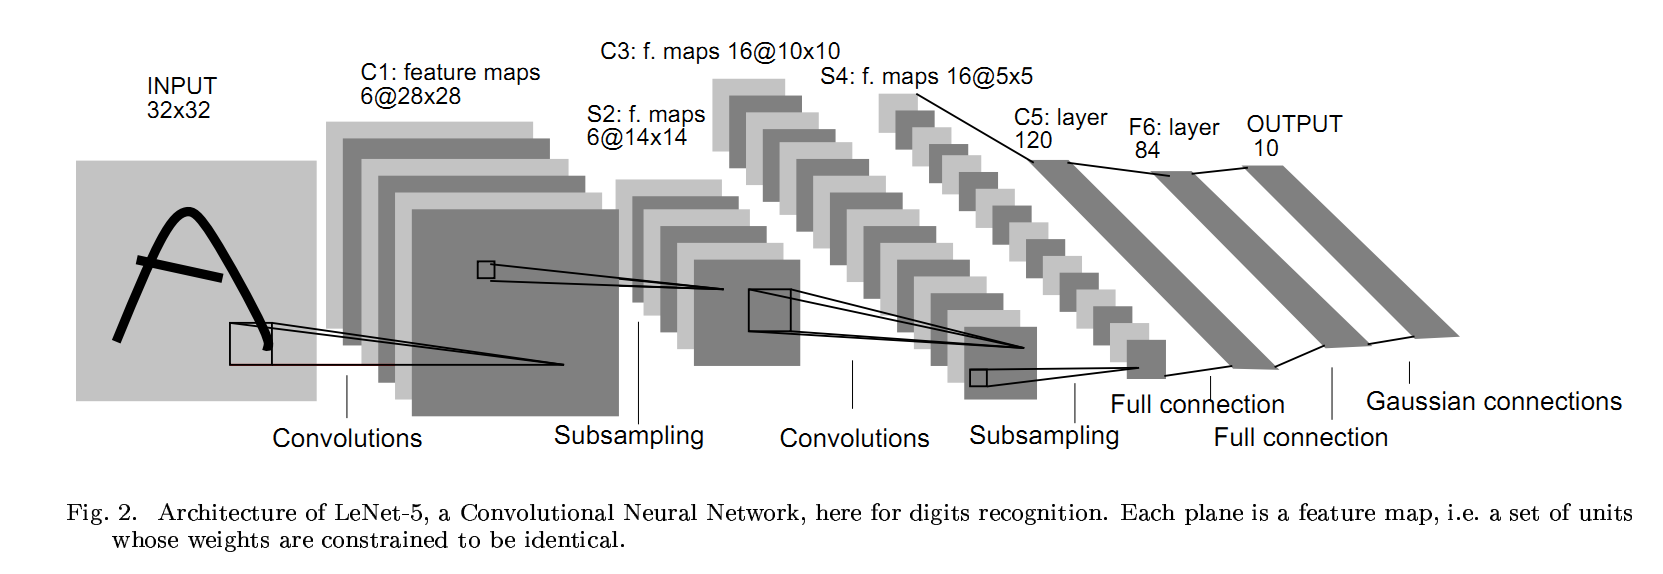

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [2]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, padding=0)
        self.pool1 = nn.AvgPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, padding=0)
        self.pool2 = nn.AvgPool2d(2, 2)
        self.conv3 = nn.Conv2d(16, 120, kernel_size=5)
        
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = torch.sigmoid(self.conv1(x))
        x = self.pool1(x)
        x = torch.sigmoid(self.conv2(x))
        x = self.pool2(x)
        x = torch.sigmoid(self.conv3(x))
        x = x.view(-1, 120)
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        
        return x

In [3]:
model = LeNet()

In [4]:
model

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [6]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [7]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 2745039.07it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 123673.73it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1012369.28it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [8]:
for epoch in range(10):  
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()  
        outputs = model(inputs)  
        loss = criterion(outputs, labels)  
        loss.backward()  
        optimizer.step() 
        
        running_loss += loss.item()
        if i % 100 == 99:
            print(f"[{epoch + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print("Finished Training")

[1] loss: 2.309
[1] loss: 2.302
[1] loss: 2.302
[1] loss: 2.304
[1] loss: 2.303
[1] loss: 2.304
[1] loss: 2.304
[1] loss: 2.302
[1] loss: 2.301
[1] loss: 2.301
[1] loss: 2.305
[1] loss: 2.304
[1] loss: 2.301
[1] loss: 2.304
[1] loss: 2.304
[1] loss: 2.304
[1] loss: 2.302
[1] loss: 2.303
[2] loss: 2.305
[2] loss: 2.303
[2] loss: 2.304
[2] loss: 2.303
[2] loss: 2.303
[2] loss: 2.303
[2] loss: 2.303
[2] loss: 2.303
[2] loss: 2.301
[2] loss: 2.303
[2] loss: 2.302
[2] loss: 2.304
[2] loss: 2.302
[2] loss: 2.303
[2] loss: 2.305
[2] loss: 2.302
[2] loss: 2.303
[2] loss: 2.302
[3] loss: 2.303
[3] loss: 2.303
[3] loss: 2.303
[3] loss: 2.304
[3] loss: 2.301
[3] loss: 2.304
[3] loss: 2.304
[3] loss: 2.303
[3] loss: 2.302
[3] loss: 2.303
[3] loss: 2.302
[3] loss: 2.303
[3] loss: 2.297
[3] loss: 2.306
[3] loss: 2.304
[3] loss: 2.302
[3] loss: 2.303
[3] loss: 2.301
[4] loss: 2.301
[4] loss: 2.304
[4] loss: 2.303
[4] loss: 2.303
[4] loss: 2.302
[4] loss: 2.303
[4] loss: 2.305
[4] loss: 2.305
[4] loss